# **<font color = blue> Haberman Data Analysis</font>**

___

## **Description**

##### The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


|**Property**|**Value**
|---- | ----
|Number of Instances | 306
|Number of Attributes | 4 (including the class attribute)
<br>

**Attribute**|**Information**
----|----
Age of patient at time of operation | numerical
         Patient's year of operation | year - 1900, numerical
         Number of positive axillary nodes detected | numerical
         Survival status (class attribute)|  1 (the patient survived 5 years or longer) <br> 2 (the patient died within 5 year)

In [47]:
%%html
<style>
table{margin-left: 0 !important;}


|**Property**|**Value**
|---- | ----
|Number of Instances | 306
|Number of Attributes | 4 (including the class attribute)


### **Importing**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading DataSet**

In [16]:
data = pd.read_csv('haberman.csv')

In [17]:
data.columns = ['age','op_year','axil_nodes','surv']

In [18]:
data.head()

,age,op_year,axil_nodes,surv
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         305 non-null    int64
 1   op_year     305 non-null    int64
 2   axil_nodes  305 non-null    int64
 3   surv        305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


## **Analysis**

### **Univariate Analysis**

In [44]:
data.groupby(by = 'surv')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
surv,,,,,,,,
1,224.0,52.116071,10.937446,30.0,43.0,52.0,60.0,77.0
2,81.0,53.679012,10.167137,34.0,46.0,53.0,61.0,83.0


In [45]:
data.groupby(by = 'surv')['op_year'].describe()

,count,mean,std,min,25%,50%,75%,max
surv,,,,,,,,
1,224.0,62.857143,3.229231,58.0,60.0,63.0,66.0,69.0
2,81.0,62.827160,3.342118,58.0,59.0,63.0,65.0,69.0


In [46]:
data.groupby(by = 'surv')['axil_nodes'].describe()

,count,mean,std,min,25%,50%,75%,max
surv,,,,,,,,
1,224.0,2.799107,5.882237,0.0,0.0,0.0,3.0,46.0
2,81.0,7.456790,9.185654,0.0,1.0,4.0,11.0,52.0


[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


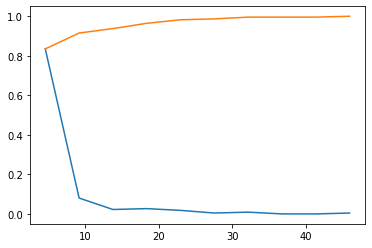

In [58]:
counts,edges = np.histogram(data[data['surv']==1]['axil_nodes'],bins = 10)
pdf = counts/(sum(counts))
print(pdf)
print(edges)
cdf = np.cumsum(pdf)
plt.plot(edges[1:],pdf)
plt.plot(edges[1:],cdf)

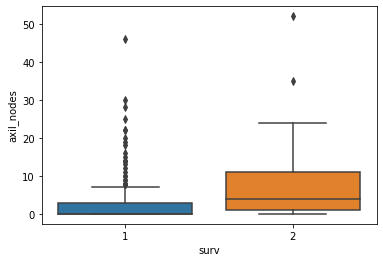

In [65]:
sns.boxplot(x= data['surv'],y = data['axil_nodes'])

### **Observations**

- 50% of patients who Survived more than 5 years had 0 positive axillary nodes
- 75% of patients who survived more than 5 years had at most 3 positive axillary nodes

# 

### **Bivariate Analysis**

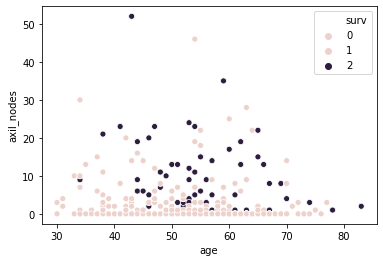

In [70]:
sns.scatterplot(y = data['axil_nodes'], x = data['age'], hue= data['surv'])

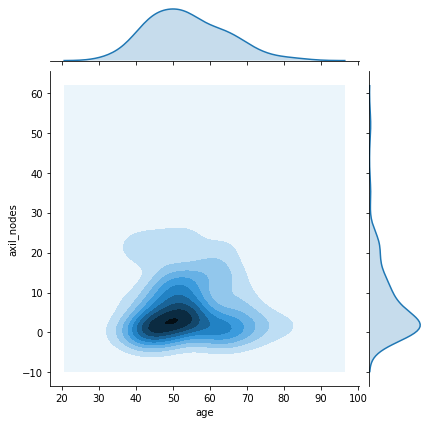

In [74]:
sns.jointplot(x = 'age', y='axil_nodes', data = data[data['surv']==2], kind='kde' )

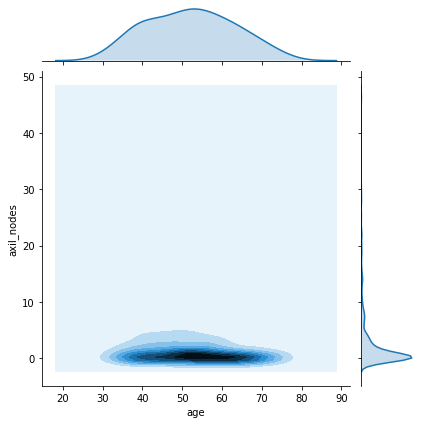

In [75]:
sns.jointplot(x = 'age', y='axil_nodes', data = data[data['surv']==1], kind='kde' )